In [0]:
# # security comment - uncomment to run
# !pip install datadotworld
# !pip install datadotworld[pandas]

In [0]:
# # security comment - uncomment to run
# !dw configure

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np

import datadotworld as dw

In [0]:
# security comment - uncomment to run
# drive.mount("/content/drive")

In [0]:
ls

drive/  sample_data/


In [0]:
cd drive/My\ Drive/Colab Notebooks/DW_M

/content/drive/My Drive/Colab Notebooks/DW_M


In [0]:
ls

DW_M_ONE/  hello_github.ipynb  LICENSE  README.md


In [0]:
cd DW_M_ONE/

/content/drive/My Drive/Colab Notebooks/DW_M/DW_M_ONE


In [0]:
ls

data/  day3.ipynb


In [0]:
!echo 'data' > .gitignore

In [0]:
!git add .gitignore

In [0]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')

In [0]:
data.dataframes

LazyLoadedDict({'7004_1': LazyLoadedValue(<pandas.DataFrame>)})

In [0]:
df = data.dataframes['7004_1']

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


In [0]:
df.shape

(19387, 48)

In [0]:
df.sample(3)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
7128,AVpfWbeB1cnluZ0-jKm9,B00EXJ0RFW,Jewelplus,"Men,Clothing, Shoes & Jewelry,Necklaces,Jewelry",NaN,NaN,2016-05-31T19:17:10Z,2016-07-28T05:58:16Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"jewelplus/ddsrch80106092p,jewelplus14kgold075m...",NaN,DDSR-CH80:106092:P,NaN,"""Jewelplus 14k Gold 0.75 Mm Solid Box Chain Ne...",2016-05-31T19:17:10Z,2015-12-16T00:00:00Z,NaN,true,NaN,NaN,NaN,FREE Shipping,NaN,NaN,http://www.amazon.com/Jewelplus-Yellow-Solid-C...,NaN,NaN,NaN,NaN,NaN,https://www.amazon.com/Jewelplus-Yellow-Solid-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,AVpfAj_4LJeJML430W2k,NaN,NIKE,"Clothing, Shoes & Accessories,Men's Shoes,Athl...",Black,NaN,2016-04-07T23:17:46Z,2016-04-07T23:17:46Z,NaN,NaN,8.867378e+11,"[{""key"":""Condition"",""value"":[""New with box""]},...",NaN,http://i.ebayimg.com/images/g/xy4AAOSwxp9W-hqE...,NaN,"886737841525,0886737841525,nikejordanflightrun...",NaN,NaN,"[{""dateSeen"":[""2016-04-06T00:00:00Z""],""name"":""...",Nike Jordan Flight Runner 2 Black/red/gray Men...,109.95,109.95,NaN,NaN,New with box,NaN,USD,2016-04-07T23:17:46Z,2016-04-06T00:00:00Z,NaN,false,NaN,NaN,NaN,FREE,NaN,NaN,http://www.ebay.com/itm/Nike-Jordan-Flight-Run...,NaN,NaN,NaN,14,"[{""sourceURLs"":[""http://www.ebay.com/itm/Nike-...",http://www.ebay.com/itm/Nike-Jordan-Flight-Run...,886737841525,NaN,NaN,NaN
1169,AVpe-IrTLJeJML43zgAD,NaN,LaCrosse,"All Men's Shoes,Shoes,Men's Shoes,Clothing",Realtree APG,NaN,2017-01-16T19:26:59Z,2017-01-16T19:26:59Z,"[{""dateSeen"":[""2017-01-16T19:26:59Z""],""sourceU...",NaN,7.154742e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/94df062f-9767...,NaN,"715474230982,0715474230982",LaCrosse Footwear,NaN,"[{""dateSeen"":[""2017-01-16T19:26:59Z""],""name"":""...",Lacrosse Footwear 425615m11 Venom Snake Boots ...,189.95,189.95,NaN,NaN,new,NaN,USD,2017-01-16T19:26:59Z,2016-11-09T00:00:00Z,NaN,false,Shopping Blitz - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/LaCrosse-Footwear-4...,NaN,NaN,NaN,11 M,NaN,https://www.walmart.com/ip/LaCrosse-Footwear-4...,715474230982,NaN,NaN,NaN


In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [0]:
df.prices_currency.value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
New with box                                              3
PalmBeach Jewelry - Walmart.com                           3
UnbeatableSale.com, Inc. - Walmart.com                    3
new                                                       3
Wholesale Costume and Party Supplies - Walmart.com        2
SHOEBACCA LTD. - Walmart.com                              1
New without tags                                          1
Shoes.com                                                 1
Name: prices_currency, dtype: int64

In [0]:
df.prices_currency.value_counts(normalize=True)

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
New with box                                          0.000155
PalmBeach Jewelry - Walmart.com                       0.000155
UnbeatableSale.com, Inc. - Walmart.com                0.000155
new                                                   0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
SHOEBACCA LTD. - Walmart.com                          0.000052
New without tags                                      0.000052
Shoes.com                                             0.000052
Name: prices_currency, dtype: float64

In [0]:
df_usd = df[df.prices_currency == 'USD'].copy()

In [0]:
df_usd.shape

(18524, 48)

In [0]:
df_usd.prices_amountmin.head()

0    39.89
1    51.99
2    40.02
3    50.31
4    46.26
Name: prices_amountmin, dtype: object

In [0]:
df_usd.prices_amountmin.astype(np.float)

0         39.89
1         51.99
2         40.02
3         50.31
4         46.26
5         55.99
6         41.12
7         46.19
8         21.40
9         45.23
10        45.00
11         7.99
12         9.99
13         9.99
14        19.99
15        25.00
16        15.99
17         9.99
19       299.99
20       124.95
21       124.95
22        60.02
23        54.22
24        44.99
25         5.99
26        86.98
27       149.00
28        63.00
29        13.99
30        23.99
          ...  
19355     17.99
19356     91.29
19357     91.29
19358    200.00
19359    114.75
19360    115.00
19361    121.50
19362     75.00
19363     25.99
19365     69.95
19367     86.01
19368    149.95
19369    174.00
19370     44.99
19371    170.00
19372    123.63
19373    123.63
19374    168.60
19375    129.59
19376     18.94
19377     18.30
19378     65.99
19379     58.99
19380     34.99
19381     94.00
19382     29.95
19383     64.95
19384     32.48
19385     31.48
19386     72.00
Name: prices_amountmin, 

In [0]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)

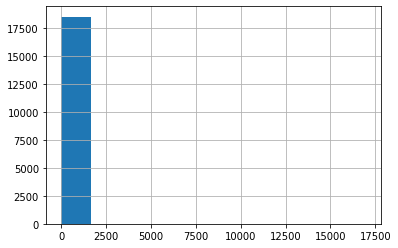

In [0]:
df_usd['prices_amountmin'].hist();

In [0]:
np.percentile(df_usd['prices_amountmin'], 99.2)

1095.3918399999725

In [0]:
filter_max = np.percentile(df_usd['prices_amountmin'], 99.2)

In [0]:
df_usd_filter = df_usd[ df_usd['prices_amountmin'] < filter_max]

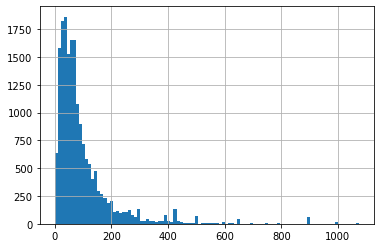

In [0]:
df_usd_filter['prices_amountmin'].hist(bins=100);

In [0]:
ls

data/  day3.ipynb


In [0]:
df.to_csv('data/shoes_prices.csv', index=False)

In [0]:
ls data

shoes_prices.csv


In [0]:
cd ..

/content/drive/My Drive/Colab Notebooks/DW_M


In [68]:
ls

DW_M_ONE/  hello_github.ipynb  LICENSE  README.md


In [69]:
!git add DW_M_ONE/day3.ipynb

fatal: pathspec 'DW_M_ONE/day3.ipynb' did not match any files


In [66]:
!git commit -m "Read MSP dataset from data.world."

On branch master
Your branch is behind 'origin/master' by 1 commit, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Untracked files:
	DW_M_ONE/

nothing added to commit but untracked files present


In [0]:
!git config --global user.email "lab@lubinski.ml"
!git config --global user.name "plubinski"

In [0]:
! git push -u origin master

fatal: 'origin' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [0]:
ls

DW_M_ONE/  hello_github.ipynb  LICENSE  README.md


In [67]:
!git push origin master

To https://github.com/plubinski/DW_M.git
 ! [rejected]        master -> master (non-fast-forward)
error: failed to push some refs to 'https://a9ea4bd2a824ec570c77daaf2cf5b6715254746c@github.com/plubinski/DW_M.git'
hint: Updates were rejected because the tip of your current branch is behind
hint: its remote counterpart. Integrate the remote changes (e.g.
hint: 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


HEAD is now at 72bee14 add my first notebook v2
